# Визуализация мешей на фоне TRT postscript сечений

In [1]:
import sys

sys.version, sys.prefix

('3.13.9 (main, Oct 14 2025, 21:29:44) [Clang 20.1.4 ]',
 '/home/dvp/dev/mckit-meshes/.venv')

In [2]:
from pathlib import Path

import numpy as np

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors, colormaps as cm
from matplotlib import ticker

In [4]:
%matplotlib inline

See matplotlib [styles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [5]:
# plt.style.available

In [6]:
# mpl.use("Qt5agg")
font = {
    "weight": "normal",
    "size": 12,
}
plt.rc("font", **font)
plt.rcParams["mathtext.default"] = "regular"
INCH = 2.54
FIG_WIDTH = int(
    10.6 / INCH
)  # Optimal for full page witdh graphs, for 1 column graph in 2 column publications use 8cm.
FIG_HEIGHT = FIG_WIDTH
plt.rcParams["figure.figsize"] = (FIG_WIDTH, FIG_HEIGHT)
plt.style.use("petroff10")
# plt.rc("grid", color="gray", linestyle="solid")
# plt.rc("xtick", direction="out", color="gray")
# plt.rc("ytick", direction="out", color="gray")

In [7]:
from mckit_meshes.plot import load_plotm_file, Page, plot_ps_page, BriefTicksAroundOneTicker, plot_2d_distribution

In [8]:
from mckit_meshes.fmesh import FMesh

In [9]:
TRT_ROOT = Path("~/dev/mcnp/trt").expanduser()
assert TRT_ROOT.is_dir()

In [10]:
PROTOTYPE_DIR = TRT_ROOT / "mcnp-5/prototype"
assert PROTOTYPE_DIR.is_dir()

In [11]:
PLOTM_DIR = PROTOTYPE_DIR / "plotm"
assert PLOTM_DIR.is_dir()

In [12]:
ps_files = list(PLOTM_DIR.glob("*.ps"))
assert ps_files
ps_files

[PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/pz=50.ps'),
 PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/ports-vertical-cut.ps'),
 PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/pz=0-rotated.ps'),
 PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/py=0-tc-vertical-cut.ps')]

In [13]:
pages = { p.stem: load_plotm_file(p)[0] for p in ps_files }
len(pages)

4

In [14]:
!ls {PROTOTYPE_DIR}/results/heat-3/npz/heat-3-5.7e09

 1014.npz   1074.npz   1134.npz   1234.npz   1294.npz
 1024.npz   1084.npz   1144.npz   1244.npz   1304.npz
 1034.npz   1094.npz   1154.npz   1254.npz   1314.npz
 1044.npz   1104.npz   1164.npz   1264.npz   1324.npz
 1054.npz   1114.npz   1214.npz   1274.npz  'total-neutron-flux-pz=50.png'
 1064.npz   1124.npz   1224.npz   1284.npz  'total-photon-flux-pz=50.png'


## Survey tallies

- 1214 - n flux 
- 1224 - n actual heating, W/cm3
- 1234 - n steel heating, W/cm3
- 1284 - n dose, uSv/h
- 1294 - p dose, uSv/h
- 1304 - p flux
- 1314 - p actual heating, W/cm3
- 1324 - p steel heating, W/cm3


## neutron total flux

In [15]:
NPZ_DIR = PROTOTYPE_DIR / "results/heat-3/npz/heat-3-5.7e09"
assert NPZ_DIR.is_dir()

In [16]:
neutron_flux_mesh = FMesh.load_npz(NPZ_DIR / "1214.npz")

In [17]:
neutron_flux_mesh.totals.shape

(100, 100, 70)

In [18]:
eq_mid_height_idx = neutron_flux_mesh.kbins.searchsorted(50)
0.5*(neutron_flux_mesh.kbins[eq_mid_height_idx-1] + neutron_flux_mesh.kbins[eq_mid_height_idx])

np.float64(49.24)

In [19]:
data = neutron_flux_mesh.totals[:,:, eq_mid_height_idx - 1]
data.shape

(100, 100)

In [20]:
x, y = neutron_flux_mesh.ibins, neutron_flux_mesh.jbins
X, Y = np.meshgrid(x, y)

In [21]:
def mids(x):
    return 0.5*(x[1:] + x[:-1])

In [22]:
set(cm.keys())

{'Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Grays_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'berlin',
 'berlin_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'ci

In [77]:
def plot_2d_distribution(x, y, data, fig, ax,
    *,
    color_bar_title=r"$\frac{1} {cm^{2} \cdot s}$",
    max_log_power=None,
    min_max_log_ratio=1e-4,
    transform=None,
    levels=None,
):
    if max_log_power is None:
        max_log_power = int(np.log10(data.max()))
    vmax = 10.0**max_log_power
    vmin = data.min()
    min_log_power = int(np.log10(vmin)) + 1
    vmin = max(min_max_log_ratio * vmax, 10.0**min_log_power)
    norm = colors.LogNorm(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap("hot")
    pcm = ax.pcolormesh(
        x,
        y,
        data,
        norm=norm,
        cmap=cmap,
        # antialiased=True,
        # shading="gouraud",
        shading="flat",
        # transform=transform,
    )
    color_bar = fig.colorbar(pcm, ax=ax, shrink=0.8)
    color_bar.ax.set_title(color_bar_title, fontsize=12)
    tick_formatter = BriefTicksAroundOneTicker()
    color_bar.ax.yaxis.set_major_formatter(tick_formatter)
    color_bar.outline.set_edgecolor("white")
    if levels is not None:
        _colors= "k" # cm.get("Wistia_r")(norm(np.array(levels)))
        contours = ax.contour(
            mids(x),
            mids(y),
            data,
            norm=norm,
            levels=levels,
            colors=_colors,
            linewidths=1.0,
            # alpha=0.5,
        )
        levels = contours.levels
        contour_labeled_levels = levels
        fmt = ticker.LogFormatterMathtext()
        fmt.create_dummy_axis()
        ax.clabel(
            contours,
            contour_labeled_levels,
            inline=1.0,
            # fmt="%.1g",
            fmt=fmt,
            # colors="k",
            fontsize=9,
        )
    


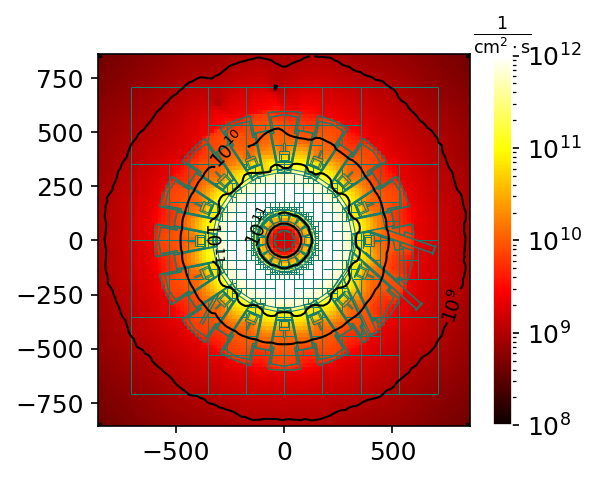

In [78]:
p = pages["pz=50"]
fig = plt.figure(dpi=150)
axes = fig.add_subplot(111)
axes.set_aspect("equal")
axes.set_xlim(x[0], x[-1])
axes.set_ylim(y[0], y[-1])
plot_ps_page(axes, p)
plot_2d_distribution(x, y, data, fig, axes, levels = np.pow(10, np.array([8,9,10,11])))
plt.savefig((NPZ_DIR / "total-neutron-flux-pz=50").with_suffix(".png"), dpi=1200)
plt.show()

In [79]:
photon_flux_mesh = FMesh.load_npz(NPZ_DIR / "1304.npz")

In [80]:
photon_data = photon_flux_mesh.totals[:,:, eq_mid_height_idx - 1]

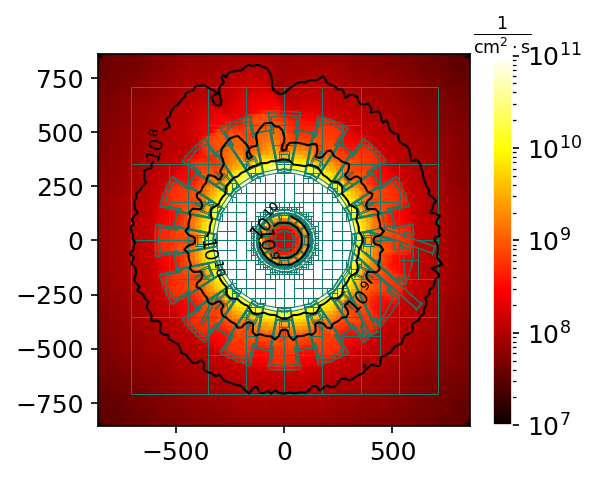

In [81]:
p = pages["pz=50"]
fig = plt.figure(dpi=150)
axes = fig.add_subplot(111)
axes.set_aspect("equal")
axes.set_xlim(x[0], x[-1])
axes.set_ylim(y[0], y[-1])
plot_ps_page(axes, p)
plot_2d_distribution(x, y, photon_data, fig, axes, levels = np.pow(10, np.array([7, 8, 9, 10])))
plt.savefig((NPZ_DIR / "total-photon-flux-pz=50").with_suffix(".png"), dpi=1200, bbox_inches="tight", transparent=True, metadata={"Title": "Total photon flux at PZ=50"})
plt.show()